<a href="https://colab.research.google.com/github/Prajwal7387/Cardio-disease-prediction-ml/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv("/content/Cardio.csv",sep=';')
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [7]:
# STEP 3: Data Preprocessing

# Check missing values
df.isnull().sum()

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert age from days to years
df['age_years'] = df['age'] / 365.25
df.drop('age', axis=1, inplace=True)

# Remove invalid blood pressure values
df = df[df['ap_hi'] > df['ap_lo']]

# Remove outliers using IQR method
def remove_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[col] >= lower) & (df[col] <= upper)]

num_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']

for col in num_cols:
    df = remove_outliers(col)

# Final check
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
Index: 62499 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62499 non-null  int64  
 1   gender       62499 non-null  int64  
 2   height       62499 non-null  int64  
 3   weight       62499 non-null  float64
 4   ap_hi        62499 non-null  int64  
 5   ap_lo        62499 non-null  int64  
 6   cholesterol  62499 non-null  int64  
 7   gluc         62499 non-null  int64  
 8   smoke        62499 non-null  int64  
 9   alco         62499 non-null  int64  
 10  active       62499 non-null  int64  
 11  cardio       62499 non-null  int64  
 12  age_years    62499 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 6.7 MB


(62499, 13)

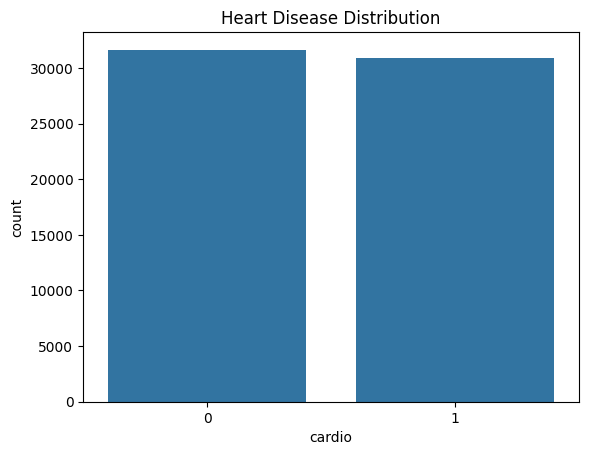

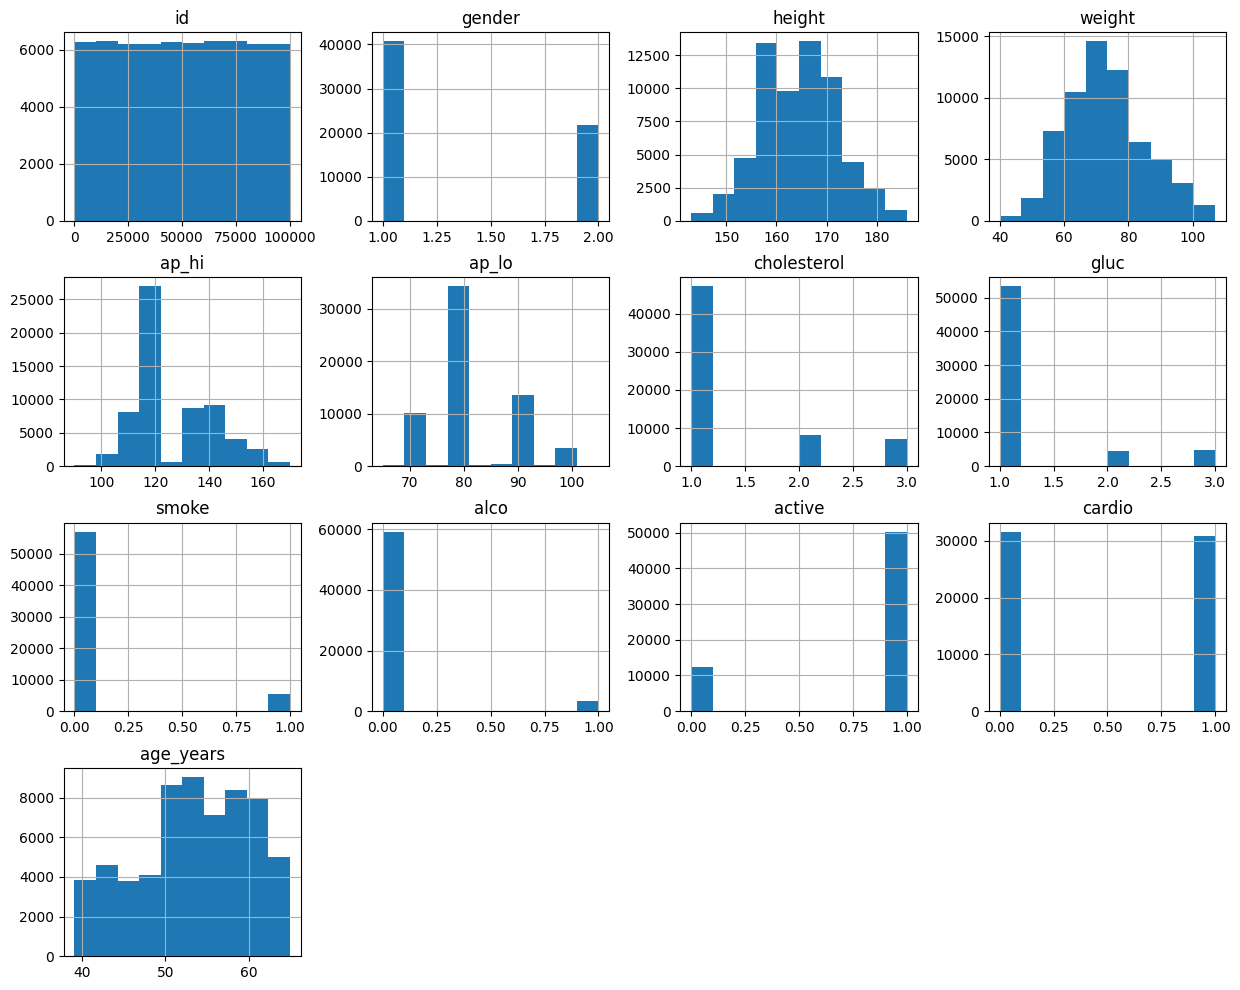

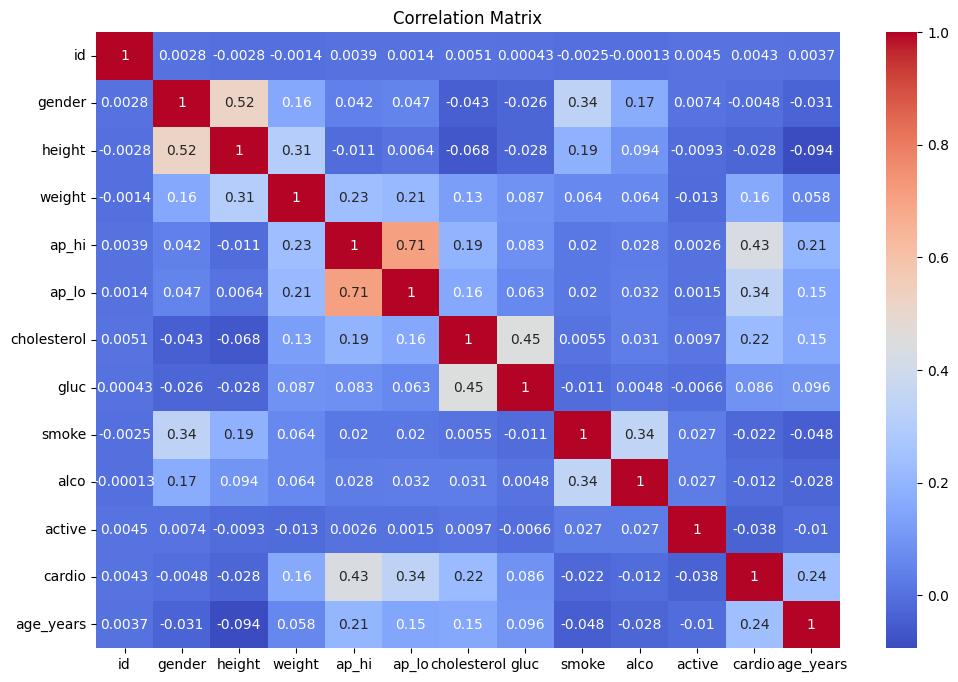

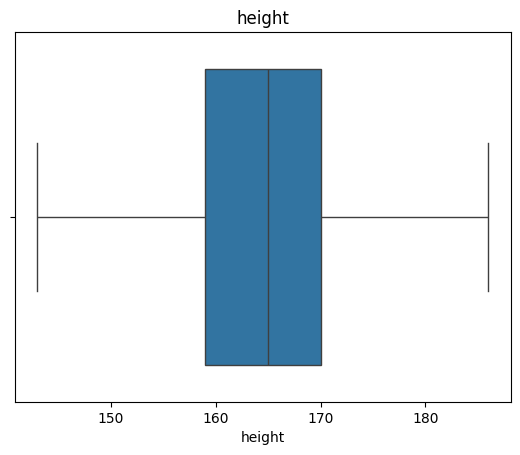

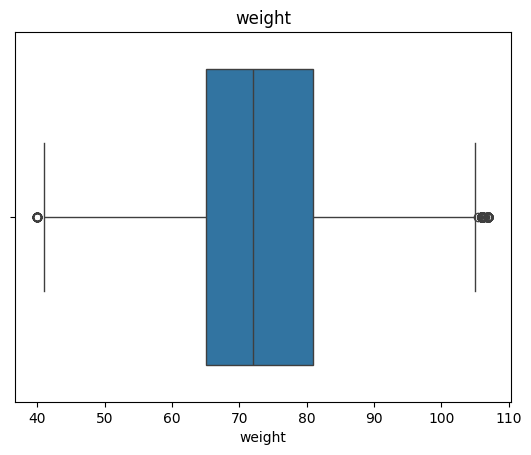

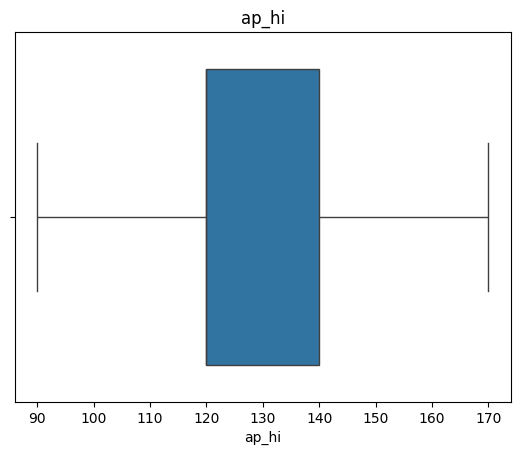

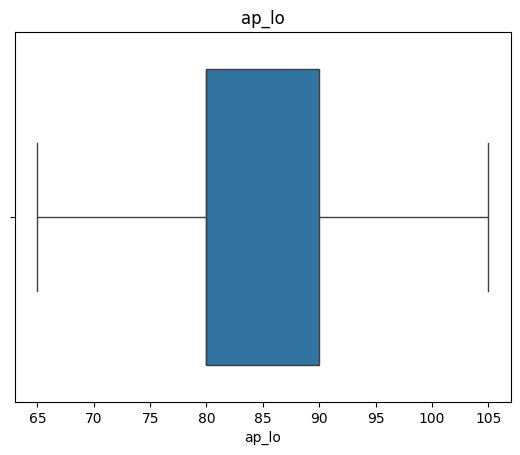

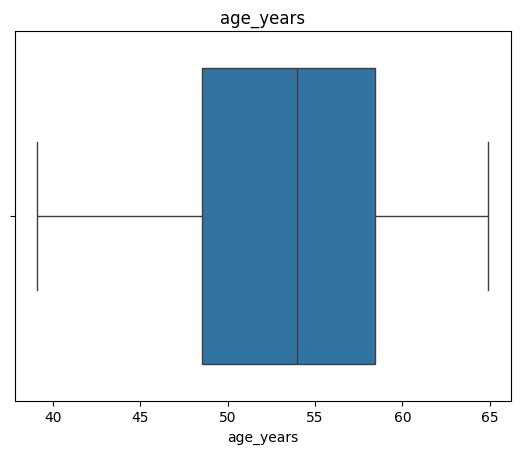

In [8]:
# Target variable distribution
plt.figure()
sns.countplot(x='cardio', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# Histograms for all features
df.hist(figsize=(15,12))
plt.show()

# Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Boxplots for numerical features
num_cols = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years']

for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('cardio', axis=1)
y = df['cardio']

# Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((49999, 12), (12500, 12), (49999,), (12500,))

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [13]:
# Function to train and evaluate model
def train_evaluate(model, name):

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    print("\n", "="*40)
    print(f"{name} Results")
    print("="*40)

    print("Accuracy:", acc)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return acc


# Dictionary to store accuracies
accuracy = {}

In [15]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
accuracy['Logistic Regression'] = train_evaluate(lr, "Logistic Regression")


Logistic Regression Results
Accuracy: 0.72928
Confusion Matrix:
[[5063 1355]
 [2029 4053]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6418
           1       0.75      0.67      0.71      6082

    accuracy                           0.73     12500
   macro avg       0.73      0.73      0.73     12500
weighted avg       0.73      0.73      0.73     12500



In [16]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
accuracy['KNN'] = train_evaluate(knn, "KNN")


KNN Results
Accuracy: 0.69368
Confusion Matrix:
[[4556 1862]
 [1967 4115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      6418
           1       0.69      0.68      0.68      6082

    accuracy                           0.69     12500
   macro avg       0.69      0.69      0.69     12500
weighted avg       0.69      0.69      0.69     12500



In [17]:
# SVM
svm = SVC()
accuracy['SVM'] = train_evaluate(svm, "SVM")



SVM Results
Accuracy: 0.73416
Confusion Matrix:
[[5114 1304]
 [2019 4063]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.75      6418
           1       0.76      0.67      0.71      6082

    accuracy                           0.73     12500
   macro avg       0.74      0.73      0.73     12500
weighted avg       0.74      0.73      0.73     12500



In [18]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
accuracy['Decision Tree'] = train_evaluate(dt, "Decision Tree")


Decision Tree Results
Accuracy: 0.6296
Confusion Matrix:
[[4092 2326]
 [2304 3778]]

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      6418
           1       0.62      0.62      0.62      6082

    accuracy                           0.63     12500
   macro avg       0.63      0.63      0.63     12500
weighted avg       0.63      0.63      0.63     12500



In [19]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
accuracy['Random Forest'] = train_evaluate(rf, "Random Forest")


Random Forest Results
Accuracy: 0.71992
Confusion Matrix:
[[4819 1599]
 [1902 4180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      6418
           1       0.72      0.69      0.70      6082

    accuracy                           0.72     12500
   macro avg       0.72      0.72      0.72     12500
weighted avg       0.72      0.72      0.72     12500



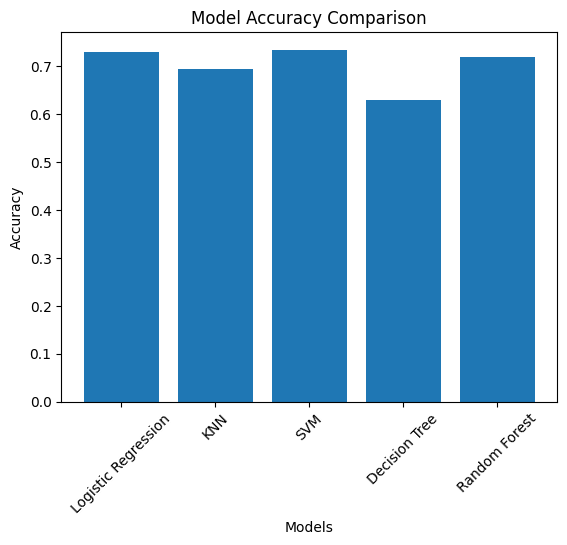

Best Model: SVM
Best Accuracy: 0.73416


In [20]:
import matplotlib.pyplot as plt

# Prepare data for plotting
models = list(accuracy.keys())
scores = list(accuracy.values())

# Plot accuracy comparison
plt.figure()
plt.bar(models, scores)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

# Find best model
best_model = max(accuracy, key=accuracy.get)
best_score = accuracy[best_model]

print("Best Model:", best_model)
print("Best Accuracy:", best_score)

In [22]:
print(X.columns)


Index(['id', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'age_years'],
      dtype='object')


In [24]:
# STEP 8: Final Prediction Function (Fixed - No Warnings)

# Set final model as SVM
final_model = svm

# Train final model on full dataset
final_model.fit(X, y)


# Prediction Function (with feature names)
def predict_heart_disease(input_data):

    import pandas as pd
    import numpy as np

    # Convert input to DataFrame with column names
    input_df = pd.DataFrame([input_data], columns=X.columns)

    # Scale input
    input_scaled = scaler.transform(input_df)

    # Predict
    prediction = final_model.predict(input_scaled)

    if prediction[0] == 1:
        return "Person is likely to have Heart Disease"
    else:
        return "Person is not likely to have Heart Disease"


# --------------------------------
# Sample Input (AGE = 55 YEARS)
# --------------------------------

sample_input = [
    15000,   # id
    2,       # gender
    170,     # height
    78,      # weight
    140,     # ap_hi
    90,      # ap_lo
    2,       # cholesterol
    1,       # glucose
    0,       # smoke
    0,       # alco
    1,       # active
    55       # age_years
]

print("Sample Age:", sample_input[-1], "years")
print("Prediction:", predict_heart_disease(sample_input))


Sample Age: 55 years
Prediction: Person is not likely to have Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
